In [34]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

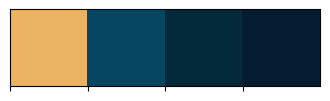

In [35]:
colors = ['#ECB365','#064663','#04293A',"#041C32"]
sns.palplot(colors)

In [11]:
(train_image, train_label),(test_image,test_label) = datasets.cifar10.load_data()

In [18]:
img = datasets.cifar10.load_data()

In [12]:
print(f'train_image : {train_image.shape} | {train_image.ndim}')
print(f'train_label : {train_label.shape} | {train_label.ndim}')
print(f'test_image : {test_image.shape} | {test_image.ndim}')
print(f'test_label : {test_label.shape} | {test_label.ndim}')

train_image : (50000, 32, 32, 3) | 4
train_label : (50000, 1) | 2
test_image : (10000, 32, 32, 3) | 4
test_label : (10000, 1) | 2


In [13]:
train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

train_label is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [14]:
train_label = train_label.reshape(-1,)
train_label[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
test_label = test_label.reshape(-1,)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    #plt.axis('off')
    plt.xlabel(classes[y[index]])

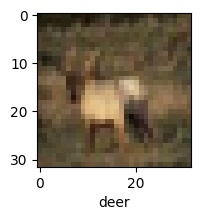

In [38]:
plot_sample(train_image,train_label,3)

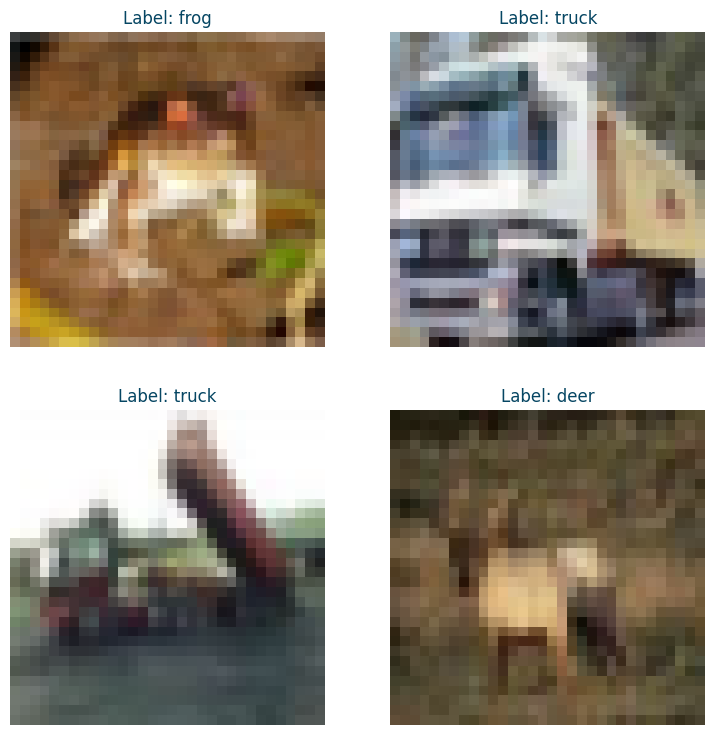

In [48]:
N = len(train_image)
idx = np.arange(0,26)
img, target = train_image[idx],train_label[idx]

fig, axes = plt.subplots(2,2, figsize=(9,9))
for im, label, ax in zip(img, target, axes.flatten()):
    ax.imshow(im, cmap='gray')
    ax.set_title(f"Label: {classes[label]}", color=colors[1])
    ax.axis('off')

In [54]:
test_image.max()

255

## normalizing training data

In [55]:
X_train = train_image / 255.0
X_test = test_image / 255.0

## Build simple artificial neural network for image classification

In [56]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
ann.fit(X_train,train_label, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 81s 51ms/step - loss: 1.8096 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.6205 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5402 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4805 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4317 - accuracy: 0.4970


In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_label, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.48      0.55      1000
           1       0.69      0.49      0.58      1000
           2       0.37      0.36      0.36      1000
           3       0.39      0.19      0.26      1000
           4       0.39      0.47      0.43      1000
           5       0.34      0.50      0.40      1000
           6       0.43      0.69      0.53      1000
           7       0.62      0.42      0.50      1000
           8       0.70      0.55      0.61      1000
           9       0.50      0.66      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



## CNN

In [63]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [64]:
cnn.fit(X_train,train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 28s 16ms/step - loss: 1.4375 - accuracy: 0.4833
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0923 - accuracy: 0.6163
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9707 - accuracy: 0.6629
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8808 - accuracy: 0.6927
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8114 - accuracy: 0.7190
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7537 - accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6977 - accuracy: 0.7574
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6527 - accuracy: 0.7734
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6066 - accuracy: 0.7900
Epoch 10/10
1563/1563 [==============================] - 34s 22m

In [65]:
cnn.evaluate(X_test,test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.9479 - accuracy: 0.6906


[0.9479317665100098, 0.6905999779701233]

In [66]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[6.37958510e-05, 1.07314406e-06, 1.31019988e-04, 9.85876679e-01,
        3.07756068e-07, 2.97626626e-04, 1.16544934e-02, 1.11141716e-07,
        1.97367393e-03, 1.10086671e-06],
       [5.28231321e-05, 6.44563755e-04, 1.61038088e-06, 7.81363809e-08,
        3.10899728e-09, 3.75239007e-10, 6.24260157e-11, 1.69768943e-13,
        9.99299169e-01, 1.81028554e-06],
       [6.65950216e-03, 6.47904864e-03, 6.96094194e-03, 1.04642857e-03,
        1.45454324e-04, 1.14148215e-05, 1.59181327e-05, 5.96685231e-06,
        9.77701902e-01, 9.73442569e-04],
       [7.60174036e-01, 2.16487236e-03, 8.47700611e-03, 7.72428175e-04,
        1.24505803e-03, 1.00426778e-05, 7.19534291e-05, 6.20753126e-05,
        2.26982877e-01, 3.96450851e-05],
       [1.31845036e-06, 5.64706568e-07, 3.00686527e-03, 4.82825525e-02,
        3.59670334e-02, 7.43488708e-05, 9.12664115e-01, 9.69864118e-07,
        2.29100624e-06, 3.55819694e-08]], dtype=float32)

In [74]:
y_pred[:1]

array([[6.37958510e-05, 1.07314406e-06, 1.31019988e-04, 9.85876679e-01,
        3.07756068e-07, 2.97626626e-04, 1.16544934e-02, 1.11141716e-07,
        1.97367393e-03, 1.10086671e-06]], dtype=float32)

In [75]:
y_classes = [np.argmax(element) for element in y_pred]

In [78]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [79]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_label, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.87      0.74      0.80      1000
           2       0.55      0.61      0.58      1000
           3       0.48      0.62      0.54      1000
           4       0.66      0.60      0.63      1000
           5       0.68      0.48      0.56      1000
           6       0.73      0.79      0.76      1000
           7       0.82      0.67      0.74      1000
           8       0.72      0.88      0.79      1000
           9       0.80      0.79      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



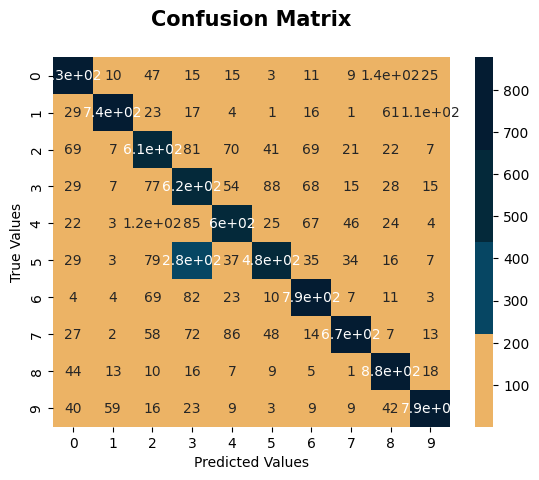

In [81]:
cm = confusion_matrix(test_label, y_pred_classes)
sns.heatmap(cm,annot=True, cmap=colors)
plt.title('Confusion Matrix\n', fontweight = 'bold',fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

1/1 [==============================] - 0s 30ms/step


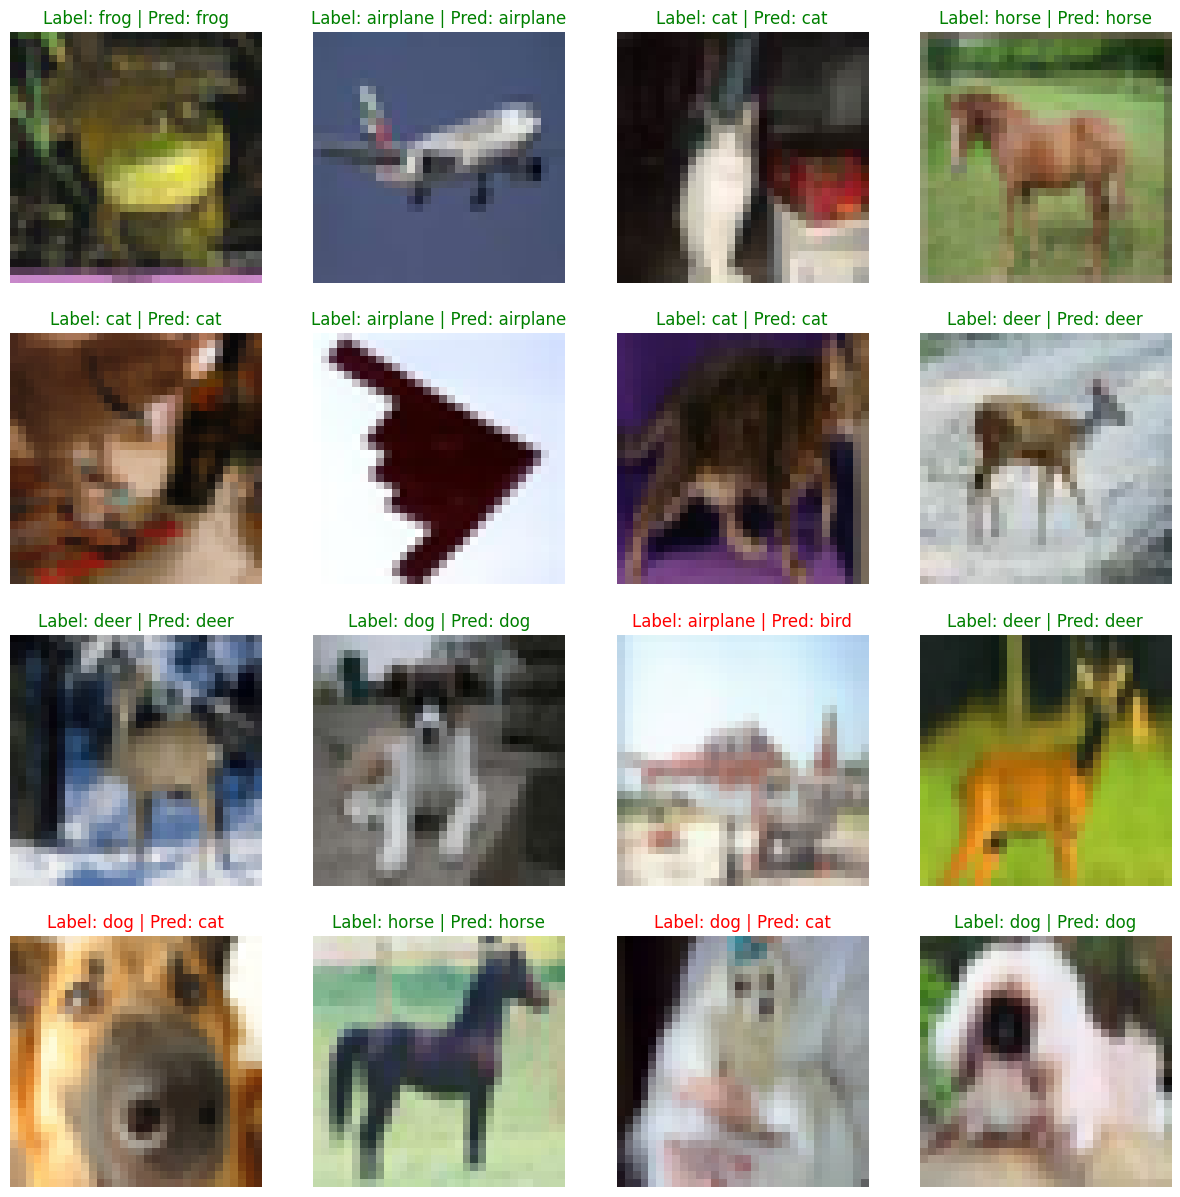

In [89]:
idx = np.random.choice(len(X_test), size=16, replace=True)
images, labels = X_test[idx], test_label[idx]
prediction = cnn.predict(images)
y_pred_classes = [np.argmax(element) for element in prediction]

fig, axes = plt.subplots(4,4, figsize=(15,15))
for img, label, pred, ax in zip(images, labels, y_pred_classes, axes.flatten()):
    font = {'color':'g'} if label == pred else {'color':'r'}
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {classes[label]} | Pred: {classes[pred]}", fontdict=font)
    ax.axis('off')